University of Helsinki, Department of Mathematics and Statistics  
MAST32001 Computational Statistics I, Autumn 2018  
Antti Honkela  

# Week 3 exercises

## 1. Sampling a 1D distribution

Write a Metropolis-Hastings sampler to sample from the (unnormalised) distribution
$$ P^*(x) = \cos^2(x) \exp(-|x|^3) $$
using a normal distribution with standard deviation $\sigma$ as the proposal
$q(x' ; x) = \mathcal{N}(x';\; x, \sigma^2)$.

1. Initialising the sampler at $x = 0$, draw 10000 samples with $\sigma=0.5$. Report the acceptance rate of the samples in Moodle.
2. Find a value of $\sigma$ that gives an acceptance rate close to the theoretically optimal value of $0.5$.
3. Evaluate $\mathrm{E}[\cos(x)]$, using samples drawn with the optimally tuned $\sigma$. Remember to throw out the warm-up samples! Report the value you obtain in Moodle.

The required tolerance for the answer is $\pm 0.03$.

Hint: It is useful to check your result by plotting a histogram of your samples and the target function (remembering it is unscaled).

In order to estimate the accuracy of your answer, it is recommended to run the sampler a few times and compute the standard deviation of the values you obtain. Monte Carlo error scales as $1/\sqrt{n}$ with the number of iterations $n$, i.e. you need to increase the number of iterations by a factor of 4 to cut the error in half.

Sampler acceptance rate: 0.7158
10000


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


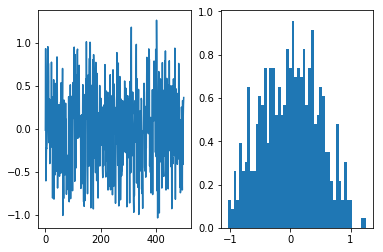

Sampler acceptance rate: 0.9669
Sampler acceptance rate: 0.9489
Sampler acceptance rate: 0.9319
Sampler acceptance rate: 0.9154
Sampler acceptance rate: 0.8932
Sampler acceptance rate: 0.8815
Sampler acceptance rate: 0.8584
Sampler acceptance rate: 0.839
Sampler acceptance rate: 0.8224
Sampler acceptance rate: 0.8175
Sampler acceptance rate: 0.79
Sampler acceptance rate: 0.7731
Sampler acceptance rate: 0.7565
Sampler acceptance rate: 0.7333
Sampler acceptance rate: 0.7219
Sampler acceptance rate: 0.7112
Sampler acceptance rate: 0.6875
Sampler acceptance rate: 0.6704
Sampler acceptance rate: 0.6574
Sampler acceptance rate: 0.647
Sampler acceptance rate: 0.6346
Sampler acceptance rate: 0.6154
Sampler acceptance rate: 0.5935
Sampler acceptance rate: 0.5862
Sampler acceptance rate: 0.5813
Sampler acceptance rate: 0.5631
Sampler acceptance rate: 0.5574
Sampler acceptance rate: 0.5518
Sampler acceptance rate: 0.5331
Sampler acceptance rate: 0.5129
Sampler acceptance rate: 0.5153
Sampler acce

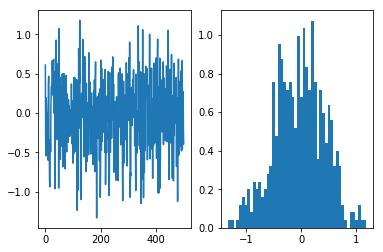

E[cos]:  0.9001953981373297
SD of xx:  0.4565534329142001
Sampler acceptance rate: 0.4963
Sampler acceptance rate: 0.4959
Sampler acceptance rate: 0.4962
Sampler acceptance rate: 0.5023
Sampler acceptance rate: 0.5016
Sampler acceptance rate: 0.511
Sampler acceptance rate: 0.5031
Sampler acceptance rate: 0.4946
Sampler acceptance rate: 0.5023
Sampler acceptance rate: 0.4967
E[cos(x)] deviation:  0.0032992542991796873


In [93]:
#%%
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt

npr.seed(111111111)
sig = 0.5
N = 10000

def Pstar(x):
    return np.log((np.cos(x)**2) * np.exp(-np.abs(x)**3))

def mhsample(x0, n, logtarget, drawprop):
    x = x0
    xs = np.zeros(n)
    accepts = 0
    for i in range(n):
        x_prop = drawprop(x)
        if np.log(npr.rand()) < logtarget(x_prop) - logtarget(x):
            x = x_prop
            accepts += 1
        xs[i] = x
    acc_rate = accepts/n
    print("Sampler acceptance rate:",acc_rate)
    return xs, acc_rate


markov, accepts = mhsample(0, N, Pstar, lambda x : npr.normal(x, sig))
print(len(markov))

x = markov[len(markov)//2:]
fig, ax = plt.subplots(1, 2)
ax[0].plot(x[::10])
#ax[1].plot(t,rv)
h = ax[1].hist(x[::10], 50, normed=True)

plt.show()

def find_var():
    var = 0.05
    vars = []
    rate = 99999
    while rate > 0.5:
        xxx, rate = mhsample(0, N, Pstar, lambda x : npr.normal(x, var))
        vars = np.append(vars, var)
        #print(len(vars))
        var += 0.03
    return vars

vars2 = find_var()
var_opt = vars2[len(vars2)-2]

print('Optimal var: ', var_opt)

markov2, accepts2 = mhsample(0, N, Pstar, lambda x : npr.normal(x, var_opt))


xx = markov2[len(markov2)//2:]
fig, ax = plt.subplots(1, 2)
ax[0].plot(xx[::10])
h = ax[1].hist(xx[::10], 50, normed=True)
plt.show()

print('E[cos]: ',np.mean(np.cos(xx)))

print('SD of xx: ', np.std(xx))

ex_values = []
for iii in range(10):
    markov2, accepts2 = mhsample(0, N, Pstar, lambda x : npr.normal(x, var_opt))
    xx = markov2[len(markov2)//2:]
    ex_values = np.append(ex_values, np.mean(np.cos(xx)))
print('E[cos(x)] deviation: ', np.std(ex_values))

## 2. Sampling a 2D distribution

Write a Metropolis-Hastings sampler to evaluate the following expectations over the given (unnormalised) distributions using a suitably scaled normal distribution as the proposal.

1. $E[x^2 + y^2]$, when $P^*(x, y) = \exp\left(-3(\sqrt{(x-x_0)^2 + (y-y_0)^2} - r^2)^2 \right)$.
2. $E[x^2 + y^2]$, when $P^*(x, y) = \exp\left(-3(\sqrt{(x-x_0)^2 + (y-y_0)^2} - r^2)^2 + |2x - y|\right)$.

Here $x_0 = 1, y_0 = 2$ and $r = \sqrt{2}$.

The required tolerance for the answer is $\pm 0.3$.

Hint: It is useful to check your result by plotting a scatter plot of your samples and a contour plot of the logarithm of the target function. Remember to throw out the warm-up samples!

Sampler acceptance rate: 0.5157
Pstar1 exp  10.05441055474084


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


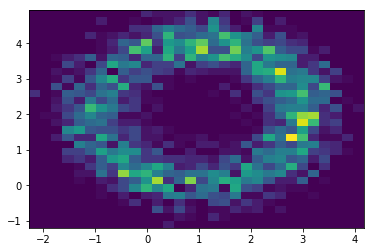

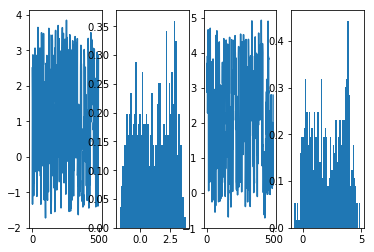

Sampler acceptance rate: 0.5112
Pstar2 exp  10.36141636186688


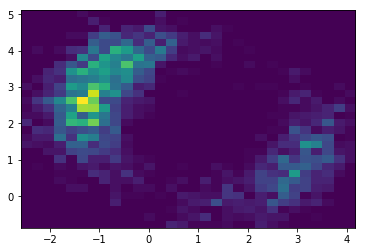

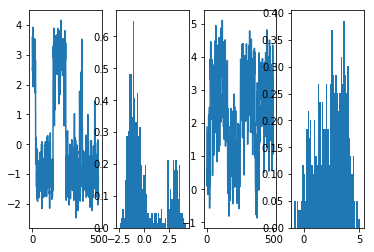

In [154]:
#%%
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

npr.seed(9999999)
sig2 = 0.66
cov2 = [[sig2**2,0],[0,sig2**2]]

sig1 = 0.8
cov1 = [[sig1**2,0],[0,sig1**2]]
N = 10000

x0=1
y0=2
r=np.sqrt(2)

def Pstar1(x,y):
    return np.log(np.exp(-3*(np.sqrt((x-x0)**2+(y-y0)**2) - r**2)**2))

def Pstar2(x,y):
    return np.log(np.exp(-3*(np.sqrt((x-x0)**2+(y-y0)**2) - r**2)**2 + np.abs(2*x -y)))

propose_draws = lambda x, w: x + w * npr.randn(*x.shape)

def mhsample(x0, n, logtarget, drawprop):
    x = np.asarray(x0)
    xs = np.zeros([n,2])
    accepts = 0
    lp = logtarget(1,2)
    for i in range(n):
        x_prop = drawprop(x)
        l_prop = logtarget(x_prop[0], x_prop[1])
        if np.log(npr.rand()) < l_prop - lp:
            x = x_prop
            lp = l_prop
            accepts += 1
        xs[i] = x
    acc_rate = accepts/n
    print("Sampler acceptance rate:",acc_rate)
    return xs, acc_rate

def sampleFunc(func, var):
    mkx, accepts = mhsample([x0,y0], N, func, lambda x: propose_draws(x, var))
    x = mkx[len(mkx[:,0])//2:,0]
    y = mkx[len(mkx[:,1])//2:,1]
    exp1 = np.mean(x**2 + y**2)
    print(func.__name__,  'exp ', exp1)
    
    plt.hist2d(x,y, bins = 30)
    fig, ax = plt.subplots(1, 4)
    ax[0].plot(x[::10])
    h2 = ax[1].hist(x[::10], 50, normed=True)
    ax[2].plot(y[::10])
    h3 = ax[3].hist(y[::10], 50, normed=True)
    plt.show()

    return mkx, accepts, exp1


### KORJATTU?
mkx1, accepts1, exp1 = sampleFunc(Pstar1, sig1)

mkx, accepts, exp = sampleFunc(Pstar2, sig2)


## 3. MCMC sampling for the posterior of the mean of the Student-t distribution

In this exercise we will use MCMC to sample the posterior distribution over the location or mean parameter $\mu$ of Student's t-distribution for a set of data points $X = (x_i)_{i=1}^n$ that are assumed to be conditionally independent given $\mu$, i.e.
$$ p(X | \mu) = \prod_{i=1}^n p(x_i | \mu), $$
where $p(x_i | \mu)$ is the Student's t-distribution centred at $\mu$ with $\nu = 5$ degrees of freedom.

Using the data loaded in the below code as $X$,
write a Metropolis-Hastings sampler to draw samples from $p(\mu | X)$ when the prior $p(\mu)$ is as follows, and return the required posterior statistics to Moodle.

1. $p(\mu) = \mathcal{N}(\mu;\; 0, 1^2)$. Report the posterior mean and standard deviation of $\mu$, i.e. mean and standard deviation of $p(\mu | X)$ estimated from the Monte Carlo samples to Moodle.
2. $p(\mu) = \mathrm{Uniform}(\mu;\; -5, 5)$. Report the posterior mean and standard deviation of $\mu$, i.e. mean and standard deviation of $p(\mu | X)$ estimated from the Monte Carlo samples to Moodle.

The require tolerance is $\pm 0.03$.

Hint: Please see Chapter 7 of the course notes for more background. You can evaluate the log-pdf of the Student-t distribution using `scipy.stats.t.logpdf()`. You can compute posterior mean and standard deviation directly as the mean and standard deviation of your samples. A suitably scaled normal distribution centred at the current point should be a good proposal. Remember to throw out the warm-up samples!

Sampler acceptance rate: 0.5109


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


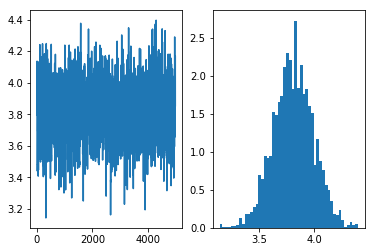

mean  3.8100001259790144  sd  0.1825193991312569


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: RuntimeWarning: divide by zero encountered in log


Sampler acceptance rate: 0.4928


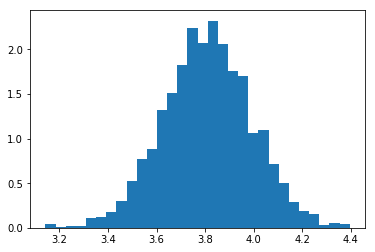

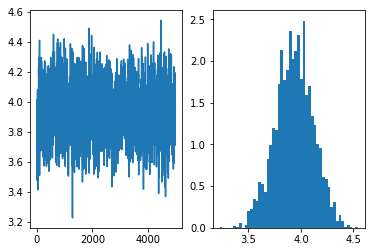

uni mean  3.9373206187836978  uni sd  0.17909488534193152


In [139]:
import numpy as np
import numpy.random as npr
import pandas as pd
import scipy.stats as sst
import matplotlib.pyplot as plt

data = pd.read_csv('http://www.helsinki.fi/~ahonkela/teaching/compstats1/toydata2.txt', sep='\t', header=None)
data = data.values
data = np.array(data[:,0])

npr.seed(3756756756)
df = 5
prop_var = 0.3496
# proposal = sst.norm(0, 0.5).rvs()
# post = np.sum(np.log(sst.t.pdf(data, df=df)))
# prior = sst.norm(0,1).rvs()

# print(proposal)
# print(prior)
# print(post)

def lnormpdf(x, mu, sigma):
    return np.sum(-0.5*np.log(2*np.pi) - np.log(sigma) - 0.5 * (x-mu)**2/sigma**2)

def uniformpdf(mu, start, end):
    if(start < mu < end):
        return 1/(end-start)
    return 0

def target(data, df, mu):
    return np.sum(sst.t.logpdf(data, df=df, loc=mu)) + lnormpdf(mu,0,1)

def target_uni(data, df, mu):
    return np.sum(sst.t.logpdf(data, df=df, loc=mu)) + np.log(uniformpdf(mu, -5,5))

propose_draws = lambda x, w: x + w * npr.randn(*x.shape)

def mhsample(x0, n, logtarget, drawprop):
    x = x0
    xs = np.zeros(n)
    accepts = 0
    for i in range(n):
        x_prop = drawprop(x)
        if np.log(npr.rand()) < logtarget(x_prop) - logtarget(x):
            x = x_prop
            accepts += 1
        xs[i] = x
    acc_rate = accepts/n
    print("Sampler acceptance rate:",acc_rate)
    return xs, acc_rate


x, accepts = mhsample(0.0, 10000, lambda x: target(data,df, x), lambda mu: npr.normal(mu,prop_var))
x = x[len(x)//2:]
# Plot a histogram of the posterior samples
fig, ax = plt.subplots(1, 2)
ax[0].plot(x)
h = ax[1].hist(x, 50, normed=True)
plt.show()

###KORJATTU?
mean = np.mean(x)

plt.hist(x, 30, normed=True)

sigma0 = 1
sigma_x = np.std(x)
n = len(data)

print('mean ', mean, ' sd ', sigma_x)
# Compare with analytical result from the above example
#tt = np.linspace(0.1, 0.9, 50)
#m_post = sigma0**2 * np.sum(data) / (n*sigma0**2 + sigma_x**2)
#s2_post = 1/(n/sigma_x**2 + 1/sigma0**2)
#y = np.array([np.exp(lnormpdf(t, m_post, np.sqrt(s2_post))) for t in tt])
#plt.plot(tt, y)
#plt.show()

prop_var = 0.37
x, accepts = mhsample(0.0, 10000, lambda x: target_uni(data,df, x), lambda mu: npr.normal(mu,prop_var))
x = x[len(x)//2:]
# Plot a histogram of the posterior samples
fig, ax = plt.subplots(1, 2)
ax[0].plot(x)
h = ax[1].hist(x, 50, normed=True)
plt.show()

###KORJATTU?
mean = np.mean(x)
sigma_x = np.std(x)
print('uni mean ', mean, ' uni sd ', sigma_x)

## 4. MCMC sampling for the posterior of gamma distribution parameters

In this exercise we test Bayesian estimation of the parameters $\alpha, \beta$ of the gamma distribution for a given data set. We will use the shape/rate parametrisation of the gamma distribution. Under this parametrisation, the probability density function of the gamma distribution is
$$ p(x) = \mathrm{Gamma}(x;\; \alpha, \beta) = \frac{\beta^\alpha}{\Gamma(\alpha)} x^{\alpha-1} \exp(-\beta x), \quad \alpha,\beta > 0,$$
where $\Gamma(x)$ is the gamma function.

The prior distributions of the parameters $\alpha$ and $\beta$ are
$$ p(\alpha) = \mathrm{Gamma}\left(\frac{1}{2}, \frac{1}{2}\right), \quad p(\beta) = \mathrm{Gamma}\left(\frac{1}{2}, \frac{1}{2}\right). $$

Please remember that the Gamma distribution has the additional constraint that its parameters $\alpha$ and $\beta$ need to be positive. This can be accomplised by using $a = \log \alpha$ and $b = \log \beta$ as variables in the sampling.

1. Load the data set $\mathcal{D} = \{ x_i | i = 1, \dots, n \}$ using the function below.
2. Implement the log-probability density function of the gamma distribution. Report the value of the log-probability density $\ln p(\alpha)$ at $\alpha = 1$.
3. Transform the prior probability densities of $\alpha$ and $\beta$ to distributions over unbounded variables $a, b$. Report the log-density value $\ln p(a)$ evaluated at $a=1$ in Moodle. (Hint: See Sec. 7.3.3. in the course notes!)
4. Sample $a, b$ using a Metropolis-Hastings sampler.
5. Transform the values of $a,b$ back to $\alpha, \beta$ and report the posterior means and standard deviations (`np.mean(alpha_samples)`, `np.std(alpha_samples)`, `np.mean(beta_samples)`, `np.std(beta_samples)`) for $\alpha$ and $\beta$ in Moodle.

The required tolerance for the posterior statistics is $\pm 0.1$.

Hint: you can check your implementations of the probability density functions by making sure they are properly normalised using e.g. `scipy.integrate.quad()`. The normal distribution centred at the current point should be a good proposal. Remember to throw out the warm-up samples!

p(alpha) -1.4189385332046727
-1.4189385332046727
0.2419707245191434
alpha1 normaliser: (1.000000000000022, 1.4939103287758826e-09)
pdf normaliser: (1.0000000000000062, 1.4939647297040892e-09)
gamma  0.2419707245191434
a1  2.11600688643711
a normaliser: (42384030.4229099, 1.1175870895385742e-07)
b normaliser: (1.0000000000006042, 2.102165774786613e-09)
c normaliser: (1.0406844905028052, 3.8727621110012933e-10)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in log


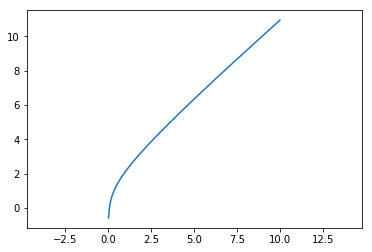

Sampler acceptance rate: 0.5059


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


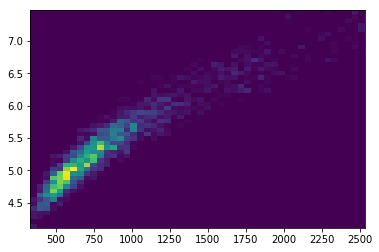

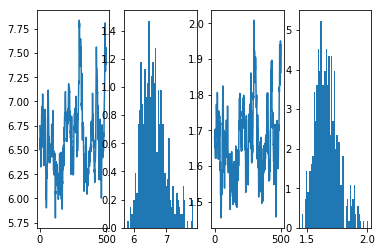

alpha mean  6.616534803207964  and sd  0.3741552329328581
beta mean  1.6638924604932457  and sd  0.09821070364310906


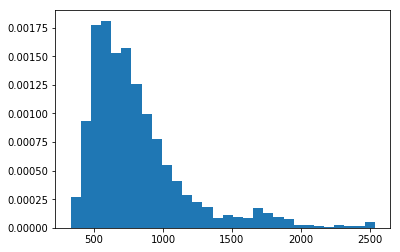

In [148]:
import numpy as np
import pandas as pd
import scipy.special as scs
import scipy.stats as sst
import numpy.random as npr
import matplotlib.pyplot as plt
import scipy.integrate as si

data1 = pd.read_csv('http://www.helsinki.fi/~ahonkela/teaching/compstats1/toydata.txt', sep='\t', header=None)
data1 = data1.values
data1 = np.array(data1[:,0])

prop_var = 0.0545
npr.seed(666)

def gamma_logpdf(x, alpha, beta):
    return (alpha*np.log(beta) - scs.gammaln(alpha) + (alpha-1) * np.log(x) - beta * x)

alpha1 = gamma_logpdf(1,0.5,0.5)
print('p(alpha)', alpha1)
print(sst.gamma.logpdf(1,0.5,scale=1/0.5))
print(sst.gamma.pdf(1,0.5,scale=1/0.5))

print('alpha1 normaliser:', si.quad(lambda x: np.exp(gamma_logpdf(x, 0.5,0.5)), 0, 100))
print('pdf normaliser:', si.quad(lambda x: sst.gamma.pdf(x, 0.5,scale=1/0.5), 0, 100))

print('gamma ', sst.gamma.pdf(1,0.5, scale=1/0.5))

def trans_a(x, alpha, beta):
    a = np.abs(np.log(alpha))
    b = beta
    J = np.log(beta)-1
    return gamma_logpdf(x,a,b)*J

def trans_b(x, alpha, beta):
    a = alpha
    b = np.abs(np.log(beta))
    J = 1/(2*a)
    return sst.gamma.pdf(x,a,scale=1/b)*J

def trans(x,alpha, beta):
    a = np.abs(np.log(alpha))
    b = np.abs(np.log(beta))
    J = 1/(2*a*b)
    return sst.gamma.pdf(x,a, scale=1/b)*J

a1 = trans_a(1,0.5,0.5)
b1 = a1
print('a1 ', a1)
print('a normaliser:', si.quad(lambda x: trans_a(x,0.5, 0.5), 0, 10000))
print('b normaliser:', si.quad(lambda x: trans_b(x,0.5, 0.5), 0, 10000))
print('c normaliser:', si.quad(lambda x: trans(x,0.5, 0.5), 0, 10000))
t = np.linspace(-0.5,10, 200)
plt.plot(t,trans_a(t,0.5,0.5))
plt.axis('equal')
plt.show()

def target(data, alpha, beta):
    return np.sum(gamma_logpdf(data, alpha, beta)) + trans_a(alpha,0.5,0.5) + trans_b(beta,0.5,0.5)

propose_draws = lambda k, w: k + w * npr.randn(*k.shape)

def mhsample(x0, n, logtarget, drawprop):
    x = np.asarray(x0)
    xs = np.zeros([n,2])
    accepts = 0
    lp = logtarget(1,2)
    for i in range(n):
        x_prop = drawprop(x)
        l_prop = logtarget(x_prop[0], x_prop[1])
        if np.log(npr.rand()) < l_prop - lp:
            x = x_prop
            lp = l_prop
            accepts += 1
        xs[i] = x
    acc_rate = accepts/n
    print("Sampler acceptance rate:",acc_rate)
    return xs, acc_rate

xx, accepts = mhsample([0.5,0.5], 10000, lambda x, y: target(data1,x,y), lambda z: propose_draws(z, prop_var))
x = xx[len(xx[:,0])//2:,0]
y = xx[len(xx[:,1])//2:,1]

plt.hist2d(np.exp(x),np.exp(y), bins=50)
fig, ax = plt.subplots(1, 4)
ax[0].plot(x[::10])
h = ax[1].hist(x[::10], 50, normed=True)
ax[2].plot(y[::10])
h1 = ax[3].hist(y[::10], 50, normed=True)

plt.show()
plt.hist(np.exp(x), 30, normed=True)

alpha_sample = x
###KORJATTU?
beta_sample = y
print('alpha mean ', np.mean(alpha_sample), ' and sd ', np.std(alpha_sample))
print('beta mean ', np.mean(beta_sample), ' and sd ', np.std(beta_sample))



## 5. Gibbs sampling for normal mean and variance

In this exercise we will apply Gibbs sampling to perform joint Bayesian inference over the mean $\mu$ and the standard deviation $\sigma$ in a normal model
$$ p(x_i | \mu, \sigma^2) = \mathcal{N}(x_i;\; \mu, \sigma^2) $$
for a data set $X = (x_i)_{i=1}^n$ loaded below.

In Gibbs sampling, we will alternate between sampling $\sigma^2$ from $p(\sigma^2 | X, \mu)$ and $\mu$ from $p(\mu | X, \sigma^2)$. This will be easy if the prior distributions for $\mu$ and $\sigma^2$ are chosen to be *conjugate*, which means that the conditional posteriors will be of the same form as the priors.

In case of the normal model the conjugate priors are:
$$ p(\mu) = \mathcal{N}(\mu;\; \mu_0, \sigma_0^2) \\ p(\sigma^2) = \mathrm{InvGamma}(\alpha, \beta), $$
where $\mathrm{InvGamma}(\alpha, \beta)$ denotes the inverse-gamma distribution.

The conditional posteriors can be evaluated as
$$ p(\sigma^2 | X, \mu) = \mathrm{InvGamma}(\sigma^2;\; \alpha^*, \beta^*) $$
with
$$ \alpha^* = \alpha + \frac{n}{2} \\  \beta^* = \beta + \frac{1}{2} \sum_{i=1}^n (x_i - \mu)^2 $$
and
$$ p(\mu | X, \sigma^2) = \mathcal{N}(\mu;\; m, s^2) $$
where
$$ m = \frac{\sigma_0^2}{\frac{\sigma^2}{n} + \sigma_0^2} \bar{x} + \frac{\sigma^2 / n}{\frac{\sigma^2}{n} + \sigma_0^2} \mu_0 \\
  s^2 = \left( \frac{1}{\sigma_0^2} + \frac{n}{\sigma^2} \right)^{-1}, $$
where $\bar{x} = \frac{1}{n} \sum_{i=1}^n x_i$.

Implement a Gibbs sampler for the problem and report the posterior means and standard deviations of $\mu$ and $\sigma$ when $\mu_0 = 0, \sigma_0^2 = 5^2, \alpha = 1, \beta = 1$. (Note: please use the standard deviation $\sigma$, not the variance $\sigma^2$ when reporting the results. You can transform samples for $\sigma^2$ to samples for $\sigma$ simply by taking the square root of each sample before computing the required statistics.)

The required tolerance is $\pm 0.03$.

Hint: feel free to use the function producing samples from the inverse-gamma distribution provided below. Remember to throw out the warm-up samples!

In [127]:
import numpy as np
import numpy.random as npr
import pandas as pd
import scipy.special as scs
import scipy.stats as sst

data = pd.read_csv('http://www.helsinki.fi/~ahonkela/teaching/compstats1/toydata2.txt', sep='\t', header=None)
data = data.values
data = np.array(data[:,0])

npr.seed(1221312343)

def rinvgamma(alpha, beta, size=1):
    return 1/npr.gamma(alpha, 1/beta, size)

mu0 = 0
sd0 = 5**2
alpha = 1
beta = 1
N = 10000
n = len(data)


def astarf(a,n):
    return a + n/2

def bstarf(b, mu, X):
    return b + 0.5*np.sum((X-mu)**2)

def s2f(sd0, sd, n):
    return 1/(1/sd0 + n/sd)

def mf(sd0, sd, n, X, mu0):
    X = np.mean(X)
    first = (sd0/(sd/n + sd0))*X
    second = ((sd/n)/(sd/n + sd0))*mu0
    return first + second

def lnormpdf(x, mu, sigma):
    return np.sum(-0.5*np.log(2*np.pi) - np.log(sigma) - 0.5 * (x-mu)**2/sigma**2)


def postmu(m, s2):
   # return lnormpdf(mu, m, s2)
   # return sst.norm.pdf(mu,m,s2)
   return npr.normal(m,s2)

def postsd(astar, bstar):
    #return sst.invgamma.pdf(sd, astar, scale=1/bstar)
    return rinvgamma(astar, bstar)

def priormu(a,b):
    return rinvgamma(a,b)

t = 0
xs = np.zeros((N,2))
mu = mu0
sd = sd0



for t in range(N):
    tt = t+1
    T = [t-1,t]
    a = astarf(alpha, n)
    #print('alfa', a)
    b = bstarf(beta, mu, data)
    #print('beta',b)
    m = mf(sd0, sd, n, data, mu0)
    #print('m', m)
    s2 = s2f(sd0, sd, n)
    #print('s2', s2)
    for iii in range(2):
        mu = postmu(m,s2)
        xs[t][0] = mu
        #print('mu', mu)
        sd = postsd(a, b)
        xs[t][1] = sd
        #print('sd', sd)
    alpha = a
    beta = b


x = xs[len(xs[:,0])//2:,0]
y = xs[len(xs[:,1])//2:,1]
print('mean mu', np.mean(x), 'deviation mu ', np.std(np.sqrt(x)))
print('mean sd', np.mean(y), 'deviation sd ', np.std(np.sqrt(y)))


mean mu 3.9628013421915997 deviation mu  0.010497119977983192
mean sd 2.1015285892409747 deviation sd  0.001690042156536044
